# Regression

## Problem definition

$X_i=(x_{i1},x_{i2},\ldots,x_{ip})$ - single observation with $p$ features \
$y_i\in\mathbb{R}$ - output value \
$f(X_i)=\hat{y}_i\approx y_i$ - prediction

## Metrics

$e_t=y_t-\hat{y}_t$
![](media\metrics.png)

$\operatorname{SSE}=\sum_{i=1}^n{\left(y_i-\hat{y}_i\right)^2}$ \
$\operatorname{SST}=\sum_{i=1}^n{\left(y_i-\bar{y}\right)^2}$
$$R^2=1-\frac{\operatorname{SSE}}{\operatorname{SST}}$$

In [598]:
import numpy as np
from sklearn.metrics import (mean_absolute_error as mae, 
                             mean_squared_error as mse, 
                             mean_absolute_percentage_error as mape, 
                             r2_score as r2)
rmse = lambda y_true, y: np.sqrt(mse(y_true, y))

## Algorithms

<AxesSubplot:>

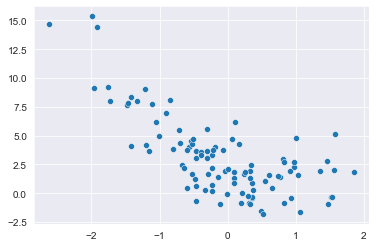

In [599]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
n = 100
np.random.seed(42)
x = np.random.randn(n)
y = x ** 2 - 2 * x + 2 + 2 * np.random.randn(n)
sns.scatterplot(x=x, y=y)

### Linear Regression

$$y_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\ldots\beta_px_{ip}+\varepsilon_i=X_i\beta^T+\varepsilon_i$$
$X_i=(1,x_{i1},x_{i2},\ldots,x_{ip})$ - little modification to the input data \
$\forall_i\:\varepsilon_i\sim\mathcal{N}(0,\sigma)$ - "random" error \
$\forall_{i\neq j}\:\varepsilon_i\perp \!\!\! \perp\varepsilon_j$ \
$\beta=(\beta_1,\beta_2,\ldots,\beta_p)$ - parameters to estimate (learn)

#### Analytical solution

$X=(X_1,X_2,\ldots,X_n)^T=\begin{bmatrix}
1&x_{11}&\ldots&x_{1p}\\
1&x_{21}&\ldots&x_{2p}\\
\vdots&\vdots&\ddots&\vdots\\
1&x_{n1}&\ldots&x_{np}\\
\end{bmatrix}$ \
$Y=(y_1,\ldots,y_n)^T$ \
$\hat{y}_i=X_i\hat{\beta}^T$ \
$L\left(\hat{\beta}\right)=\frac{1}{2}\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2$ \
$$\frac{\partial L}{\partial \hat{\beta}}=X^TX\beta-X^TY$$
$$\hat{\beta}=\left(X^TX\right)^{-1}X^TY$$

#### Gradient Descent

$$\hat{\beta}^{(n+1)}=\hat{\beta}^{(n)}-\alpha\nabla L\left(\hat{\beta}\right)=\hat{\beta}^{(n)}-\alpha\frac{ \partial L}{\partial \hat{\beta}}=\hat{\beta}^{(n)}-\alpha\left(X^TX\beta-X^TY\right)=\hat{\beta}^{(n)}+\alpha\sum_{i=1}^n{X_i\left(y_i-\hat{y}_i\right)}$$

![](media\gradient_descent.png)

In [600]:
def gradient_descent(model, x, y, loss=mse, steps=100, alpha=1e-3, history=True):
    
    beta = np.random.randn(1, x.shape[1])
    losses = []
    for _ in range(steps):
        losses.append(loss(y, model(x, beta)))
        beta += alpha * np.sum(x * (y - model(x, beta)), axis=0)
    
    return beta, losses if history else beta

In [601]:
x_model = np.vstack((np.ones(n), x)).T
y_model = y.reshape(-1, 1)
beta, losses = gradient_descent(lambda x, beta: x @ beta.T, x_model, y_model)

<AxesSubplot:>

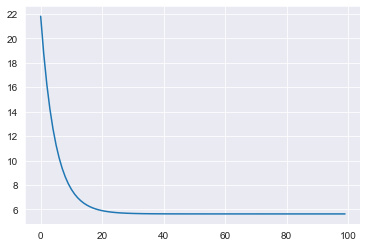

In [602]:
sns.lineplot(x=np.arange(len(losses)), y=losses)

<AxesSubplot:>

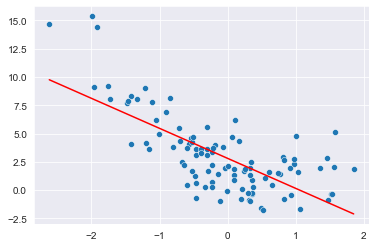

In [603]:
sns.scatterplot(x=x, y=y)
y_hat = np.sort(x_model, axis=0) @ beta.T
sns.lineplot(x=np.sort(x_model, axis=0)[:, 1], y=y_hat[:, 0], color='r')

#### Train/Test Split

In [604]:
from sklearn.model_selection import train_test_split

x = x.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8)

In [605]:
model_stats = lambda y_true, y: print(f'rmse: {rmse(y_true, y)} \nmae: {mae(y_true, y)} \nmape: {mape(y_true, y)} \nr^2: {r2(y_true, y)}')

In [606]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
model_stats(y_test, lr.predict(x_test))

rmse: 2.339594297601196 
mae: 1.8996893938786683 
mape: 2.2447475229216325 
r^2: 0.2858182939449756


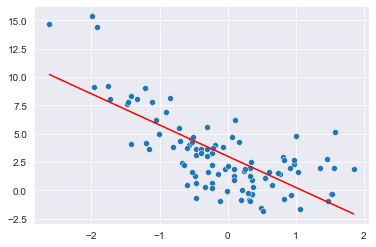

In [607]:
def plot_model(model, x, y):
    
    x_plot = x[:, 0]
    sns.scatterplot(x=x_plot, y=y)
    sns.lineplot(x=np.sort(x_plot), y=model.predict(np.sort(x, axis=0)), color='r')
    
plot_model(lr, x, y)

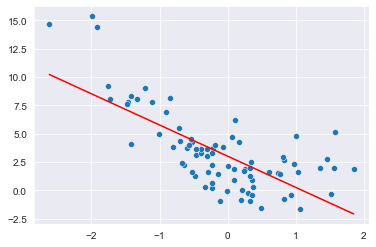

In [608]:
plot_model(lr, x_train, y_train)

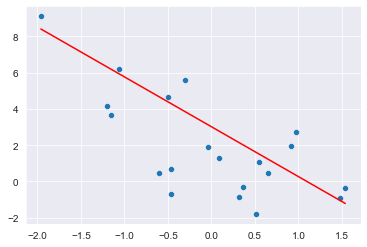

In [609]:
plot_model(lr, x_test, y_test)

### Regularized Linear Regression

#### Ridge Regression

$\hat{y}_i=X_i\hat{\beta}^T$ \
$$L\left(\hat{\beta}\right)=\frac{1}{2}\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2+\alpha\sum_{i=1}^p{\beta_i^2}$$

In [610]:
from sklearn.linear_model import Ridge

alpha = .1
ridge = Ridge(alpha=alpha)
ridge.fit(x_train, y_train)
model_stats(y_test, ridge.predict(x_test))

rmse: 2.338907599679912 
mae: 1.8992624266062195 
mape: 2.2437817467287897 
r^2: 0.2862374735612574


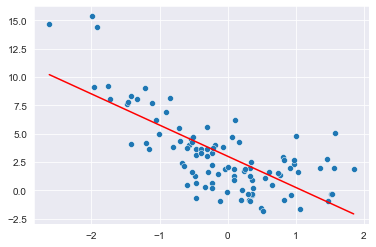

In [611]:
plot_model(ridge, x, y)

#### Lasso Regression

$\hat{y}_i=X_i\hat{\beta}^T$ \
$$L\left(\hat{\beta}\right)=\frac{1}{2}\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2+\alpha\sum_{i=1}^p{|\beta_i|}$$

In [612]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=alpha)
lasso.fit(x_train, y_train)
model_stats(y_test, lasso.predict(x_test))

rmse: 2.3221285352003593 
mae: 1.8932976771676047 
mape: 2.2232417031473206 
r^2: 0.2964416468656301


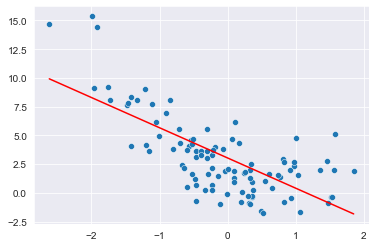

In [613]:
plot_model(lasso, x, y)

#### Elastic Net Regression

$\hat{y}_i=X_i\hat{\beta}^T$ \
$$L\left(\hat{\beta}\right)=\frac{1}{2}\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2+\alpha\left(r\sum_{i=1}^p{|\beta_i|}+(1-r)\sum_{i=1}^p{\beta_i^2}\right)$$

In [614]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=alpha, l1_ratio=.5)
en.fit(x_train, y_train)
model_stats(y_test, en.predict(x_test))

rmse: 2.312317163992694 
mae: 1.8988797634086936 
mape: 2.218219070188307 
r^2: 0.3023743841667166


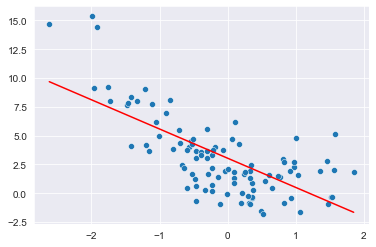

In [615]:
plot_model(en, x, y)

### Polynomial Regression

1. Extend features from $\{x_1,\ldots,x_p\}$ to $\left\{x_1^{d_1}x_2^{d_2}\ldots x_p^{d_p}:\: \sum_{i=1}^p{d_i}\le d\right\}$
2. Apply linear regression

In [616]:
from sklearn.preprocessing import PolynomialFeatures

quad = lambda x: PolynomialFeatures(2).fit_transform(x)
quad(x)

array([[ 1.00000000e+00,  4.96714153e-01,  2.46724950e-01],
       [ 1.00000000e+00, -1.38264301e-01,  1.91170170e-02],
       [ 1.00000000e+00,  6.47688538e-01,  4.19500442e-01],
       [ 1.00000000e+00,  1.52302986e+00,  2.31961994e+00],
       [ 1.00000000e+00, -2.34153375e-01,  5.48278029e-02],
       [ 1.00000000e+00, -2.34136957e-01,  5.48201146e-02],
       [ 1.00000000e+00,  1.57921282e+00,  2.49391312e+00],
       [ 1.00000000e+00,  7.67434729e-01,  5.88956064e-01],
       [ 1.00000000e+00, -4.69474386e-01,  2.20406199e-01],
       [ 1.00000000e+00,  5.42560044e-01,  2.94371401e-01],
       [ 1.00000000e+00, -4.63417693e-01,  2.14755958e-01],
       [ 1.00000000e+00, -4.65729754e-01,  2.16904203e-01],
       [ 1.00000000e+00,  2.41962272e-01,  5.85457409e-02],
       [ 1.00000000e+00, -1.91328024e+00,  3.66064129e+00],
       [ 1.00000000e+00, -1.72491783e+00,  2.97534153e+00],
       [ 1.00000000e+00, -5.62287529e-01,  3.16167266e-01],
       [ 1.00000000e+00, -1.01283112e+00

In [617]:
pr = LinearRegression()
pr.fit(quad(x_train), y_train)
model_stats(y_test, pr.predict(quad(x_test)))

rmse: 2.178449698344829 
mae: 1.8698678915083513 
mape: 2.062848485727865 
r^2: 0.38081177954521317


In [618]:
import plotly.express as px 
import plotly.graph_objects as go

x_quad = quad(x)

p1 = go.Scatter3d(x=x_quad[:, 1], y=x_quad[:, 2], z=pr.predict(x_quad), mode='markers')
p2 = go.Scatter3d(x=x_quad[:, 1], y=x_quad[:, 2], z=y, marker={'color': 'red'}, mode='markers')
go.Figure(data=[p1, p2])

### Generalized Linear Models

$\eta = X\beta^T$ - linear predictor \
$g(Y)=\eta+\varepsilon$ - link function \
$f_{Y}(y;\beta)$ - PDF \
$\hat{Y}=\mathbb{E}(Y|X;\beta)=g^{-1}(\eta)$ - prediction \
$$\hat{\beta}^{(n+1)}=\hat{\beta}^{(n)}+\alpha\sum_{i=1}^n{X_i\left(y_i-g^{-1}\left(\hat{y}_i\right)\right)}$$

[![](media\glm.jpg)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html)

<AxesSubplot:>

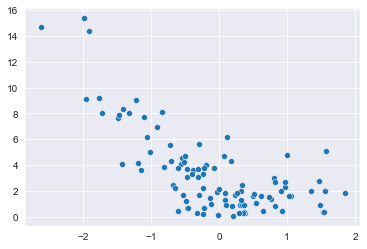

In [619]:
y_plus = abs(y)
y_train_plus = abs(y_train)
y_test_plus = abs(y_test)
sns.scatterplot(x=x[:, 0], y=y_plus)

In [620]:
from sklearn.linear_model import TweedieRegressor

poisson = TweedieRegressor(power=1)
poisson.fit(x_train, y_train_plus)
model_stats(y_test_plus, poisson.predict(x_test))

rmse: 1.7628414250161981 
mae: 1.506022520933124 
mape: 1.9299064131270842 
r^2: 0.43574194403285704


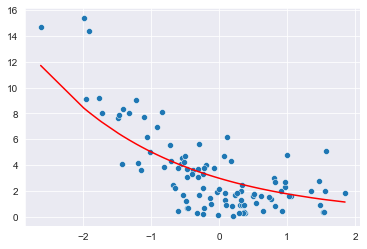

In [621]:
plot_model(poisson, x, y_plus)

In [622]:
gamma = TweedieRegressor(power=2)
gamma.fit(x_train, y_train_plus)
model_stats(y_test_plus, gamma.predict(x_test))

rmse: 1.9681248812764383 
mae: 1.70436354799192 
mape: 2.1050510051643236 
r^2: 0.2966741545491923


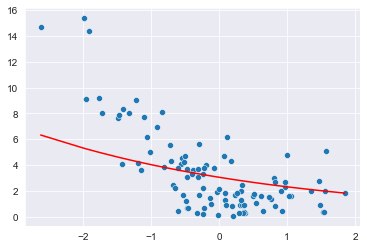

In [623]:
plot_model(gamma, x, y_plus)

### Other Linear Models

[Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)

### K-Nearest Neighbors

$x$ - data to be predicted \
$d_i = \|x-X_{i\cdot}\|$ - distance from observed data \
$n_i=y_i|d_{i:n}$ - ith nearest class \
$NN=(n_1,\ldots,n_k)$ - nearest neighbours \
$\hat{y}=\frac{1}{k}\sum_i^k{n_i}$ \
![](media\knn.png)

In [624]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(3)
knn.fit(x_train, y_train)
model_stats(y_test, knn.predict(x_test))

rmse: 2.3190059740988955 
mae: 1.982858227282683 
mape: 2.001652096784887 
r^2: 0.2983325214032715


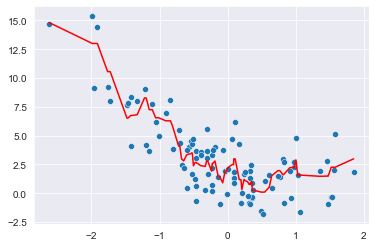

In [625]:
plot_model(knn, x, y)

In [626]:
knn_10 = KNeighborsRegressor(10)
knn_10.fit(x_train, y_train)
model_stats(y_test, knn_10.predict(x_test))

rmse: 2.136570894133743 
mae: 1.7966730431954798 
mape: 1.9114702780723714 
r^2: 0.40438965982987607


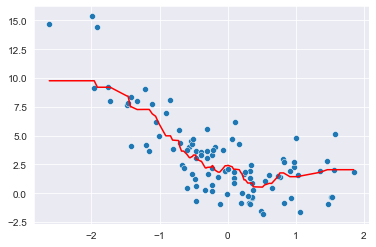

In [627]:
plot_model(knn_10, x, y)

### Scaling

#### Standarization

$$\tilde{X}=\frac{X-\bar{X}}{\sigma_X}$$


#### Min-Max
$$\tilde{X}=\frac{X-\min{X}}{\max{X}-\min{X}}$$

[Other Scalers](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

In [628]:
from sklearn.preprocessing import StandardScaler

scaled = lambda x: StandardScaler().fit_transform(x)
knn_scaled = KNeighborsRegressor(3).fit(scaled(x_train), y_train)
model_stats(y_test, knn_scaled.predict(scaled(x_test)))

rmse: 2.5941881740230377 
mae: 2.1633049864497 
mape: 2.1608761293853282 
r^2: 0.12192712060870692


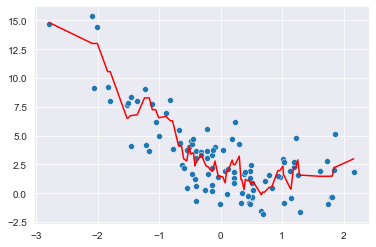

In [629]:
plot_model(knn_scaled, scaled(x), y)

### Decision Trees

![](media\decision_tree.png)

$R_p$ - parent node \
$R_l,R_r$ - left and right nodes \
$S:R_p\rightarrow \{R_l,R_r\}$ - split \
$\hat{y}_a=\frac{1}{|R_a|}\sum_{\{y_i\in R_a\}}{y_i}$ - prediction \
$L(R_a)=\frac{1}{|R_a|}\sum_{i=1}^{|R_a|}{\left(y_i-\hat{y}_a\right)^2}$ - Loss Function (MSE) \
$IG(S)=L(R_p)-\left(P(R_l)L(R_l)+P(R_r)L(R_p)\right)$ - Information Gain \
$S=\operatorname{argmax}_{S^{*}}IG\left(S^{*}\right)$

In [630]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor(max_depth=10)
dt.fit(x_train, y_train)
model_stats(y_test_plus, dt.predict(x_test))

rmse: 2.6897901869027074 
mae: 2.1440510685565926 
mape: 1.7399998462902861 
r^2: -0.31367544739604347


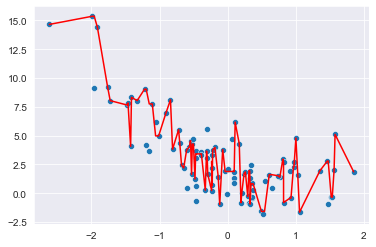

In [631]:
plot_model(dt, x, y)

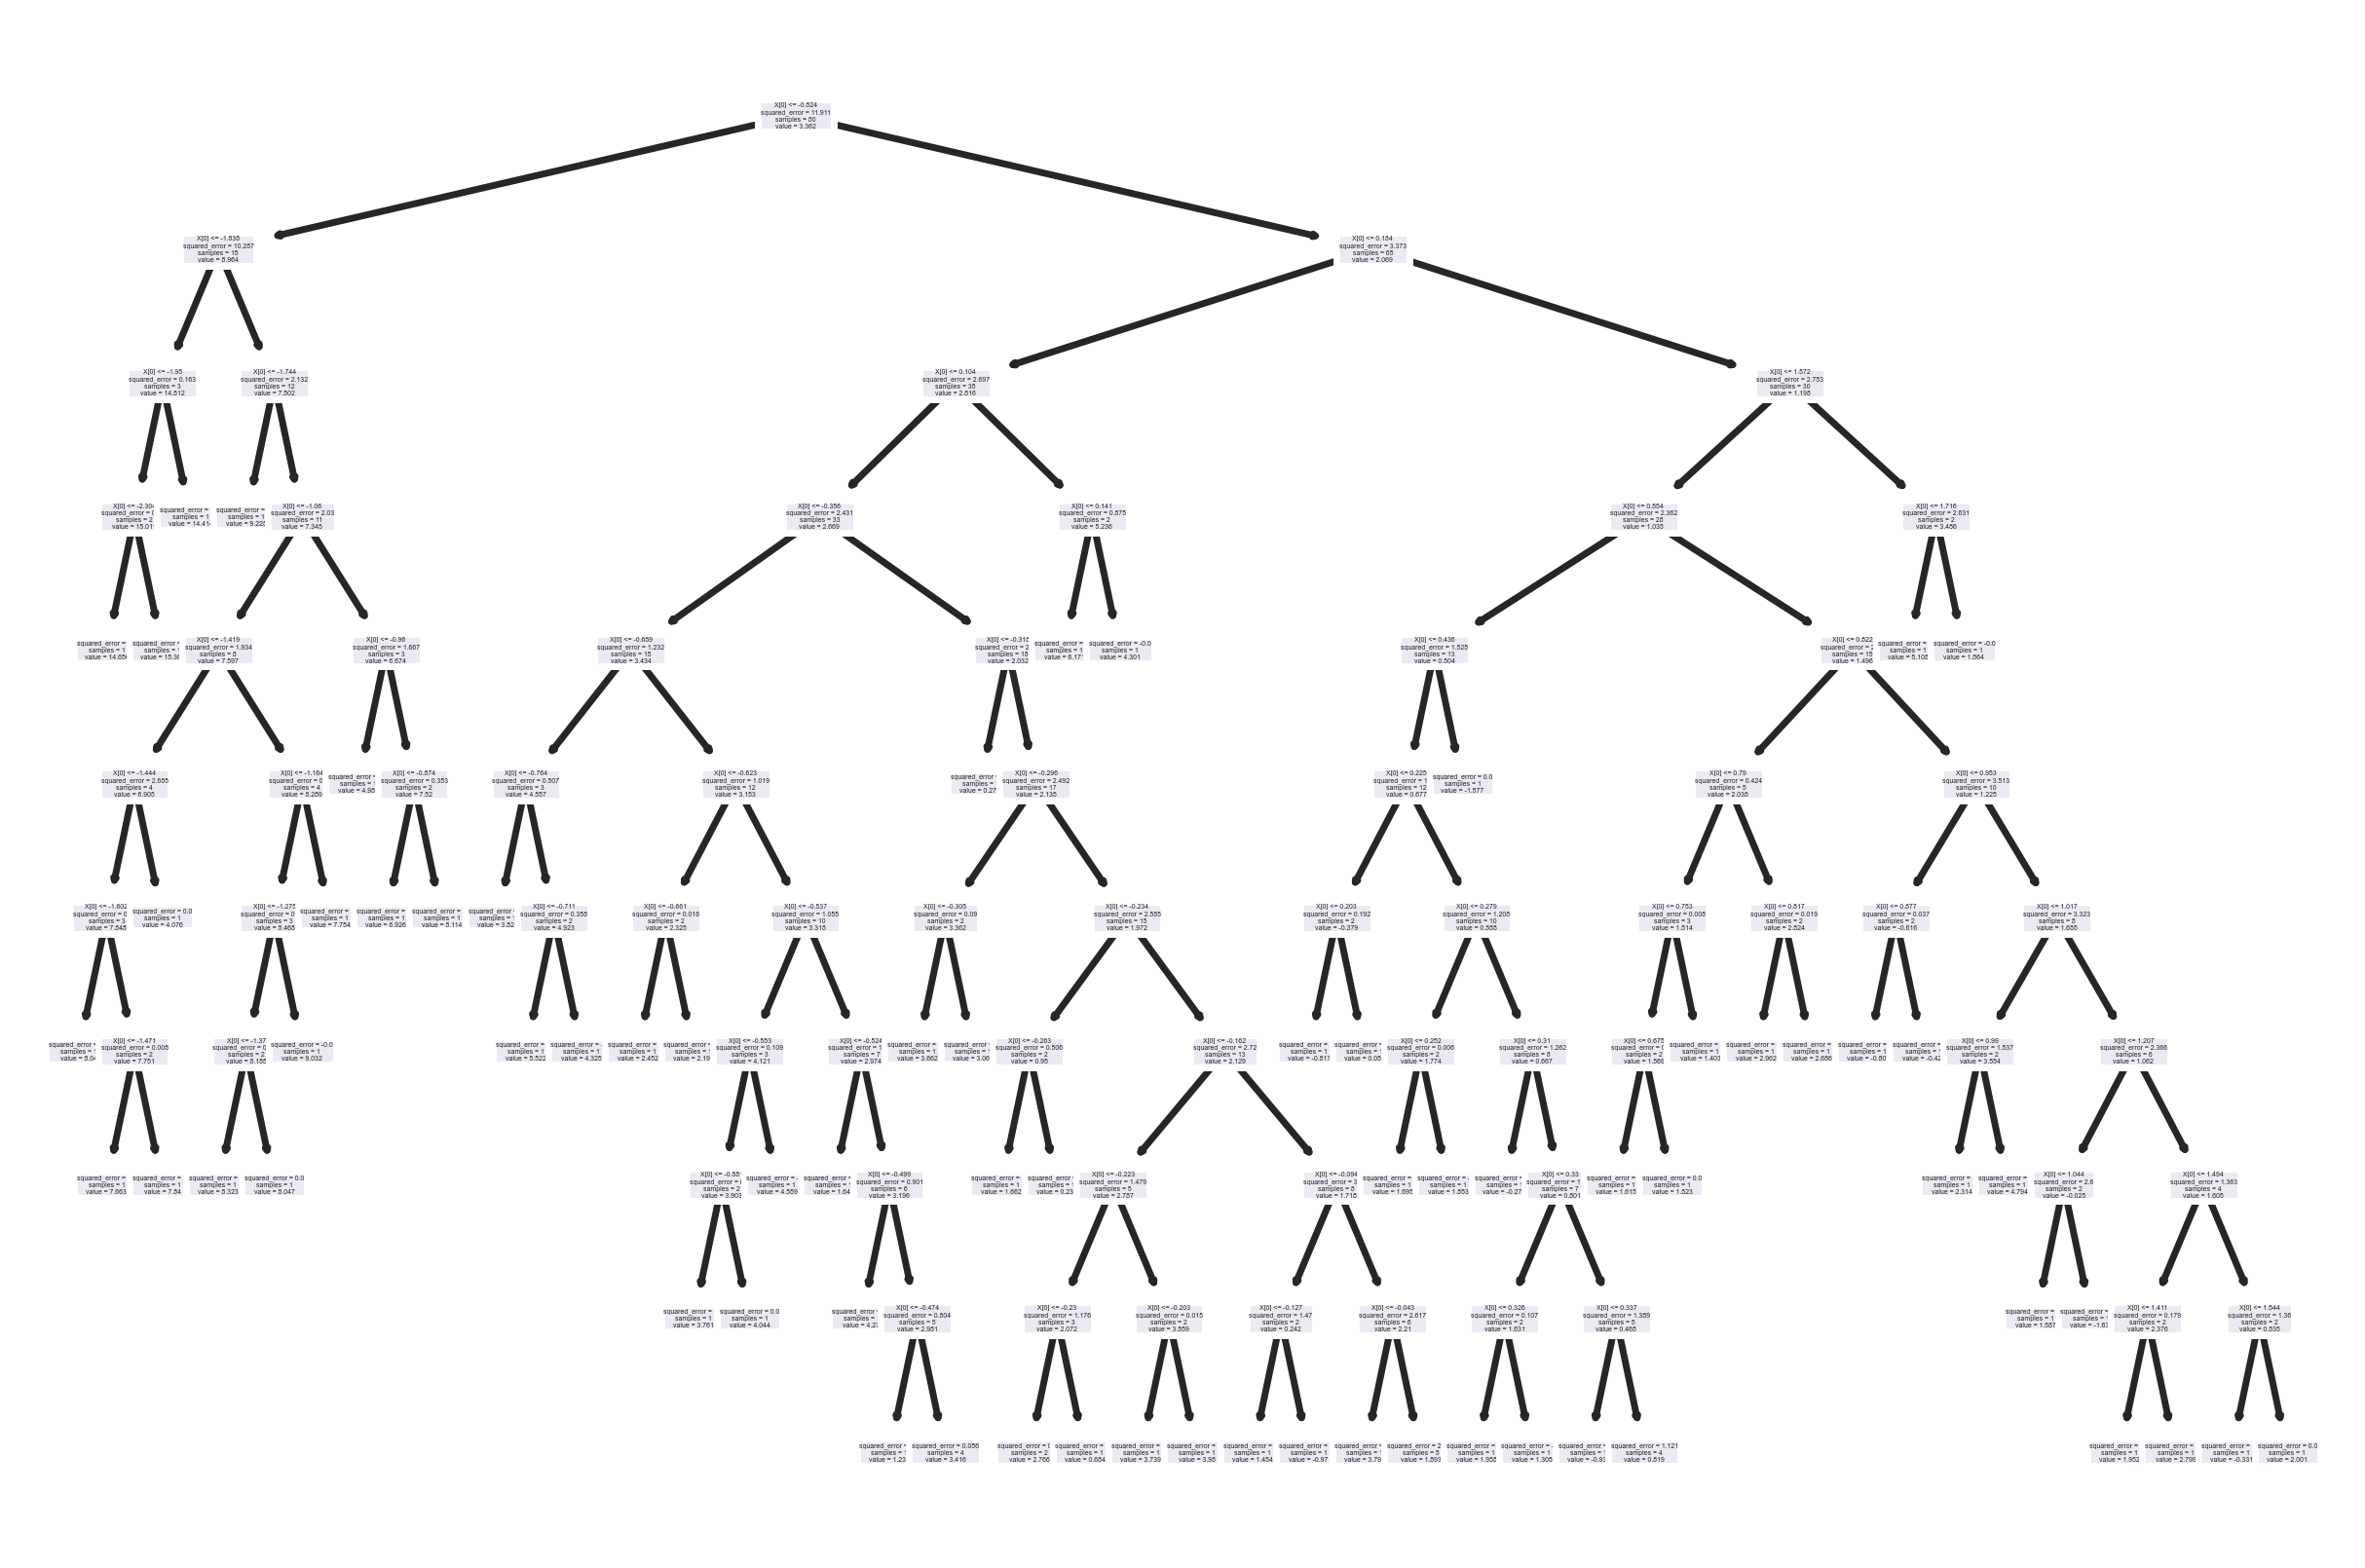

In [632]:
ax, fig = plt.subplots(1, dpi=500)
plot_tree(dt)
plt.show()

In [633]:
dt_5 = DecisionTreeRegressor(max_depth=5)
dt_5.fit(x_train, y_train)
model_stats(y_test_plus, dt_5.predict(x_test))

rmse: 2.6282606844640073 
mae: 2.073529734162458 
mape: 1.563459567702592 
r^2: -0.2542616701122127


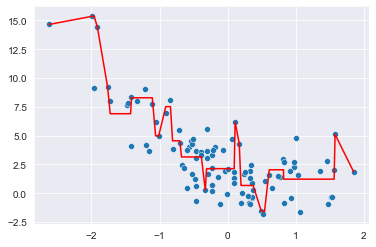

In [634]:
plot_model(dt_5, x, y)

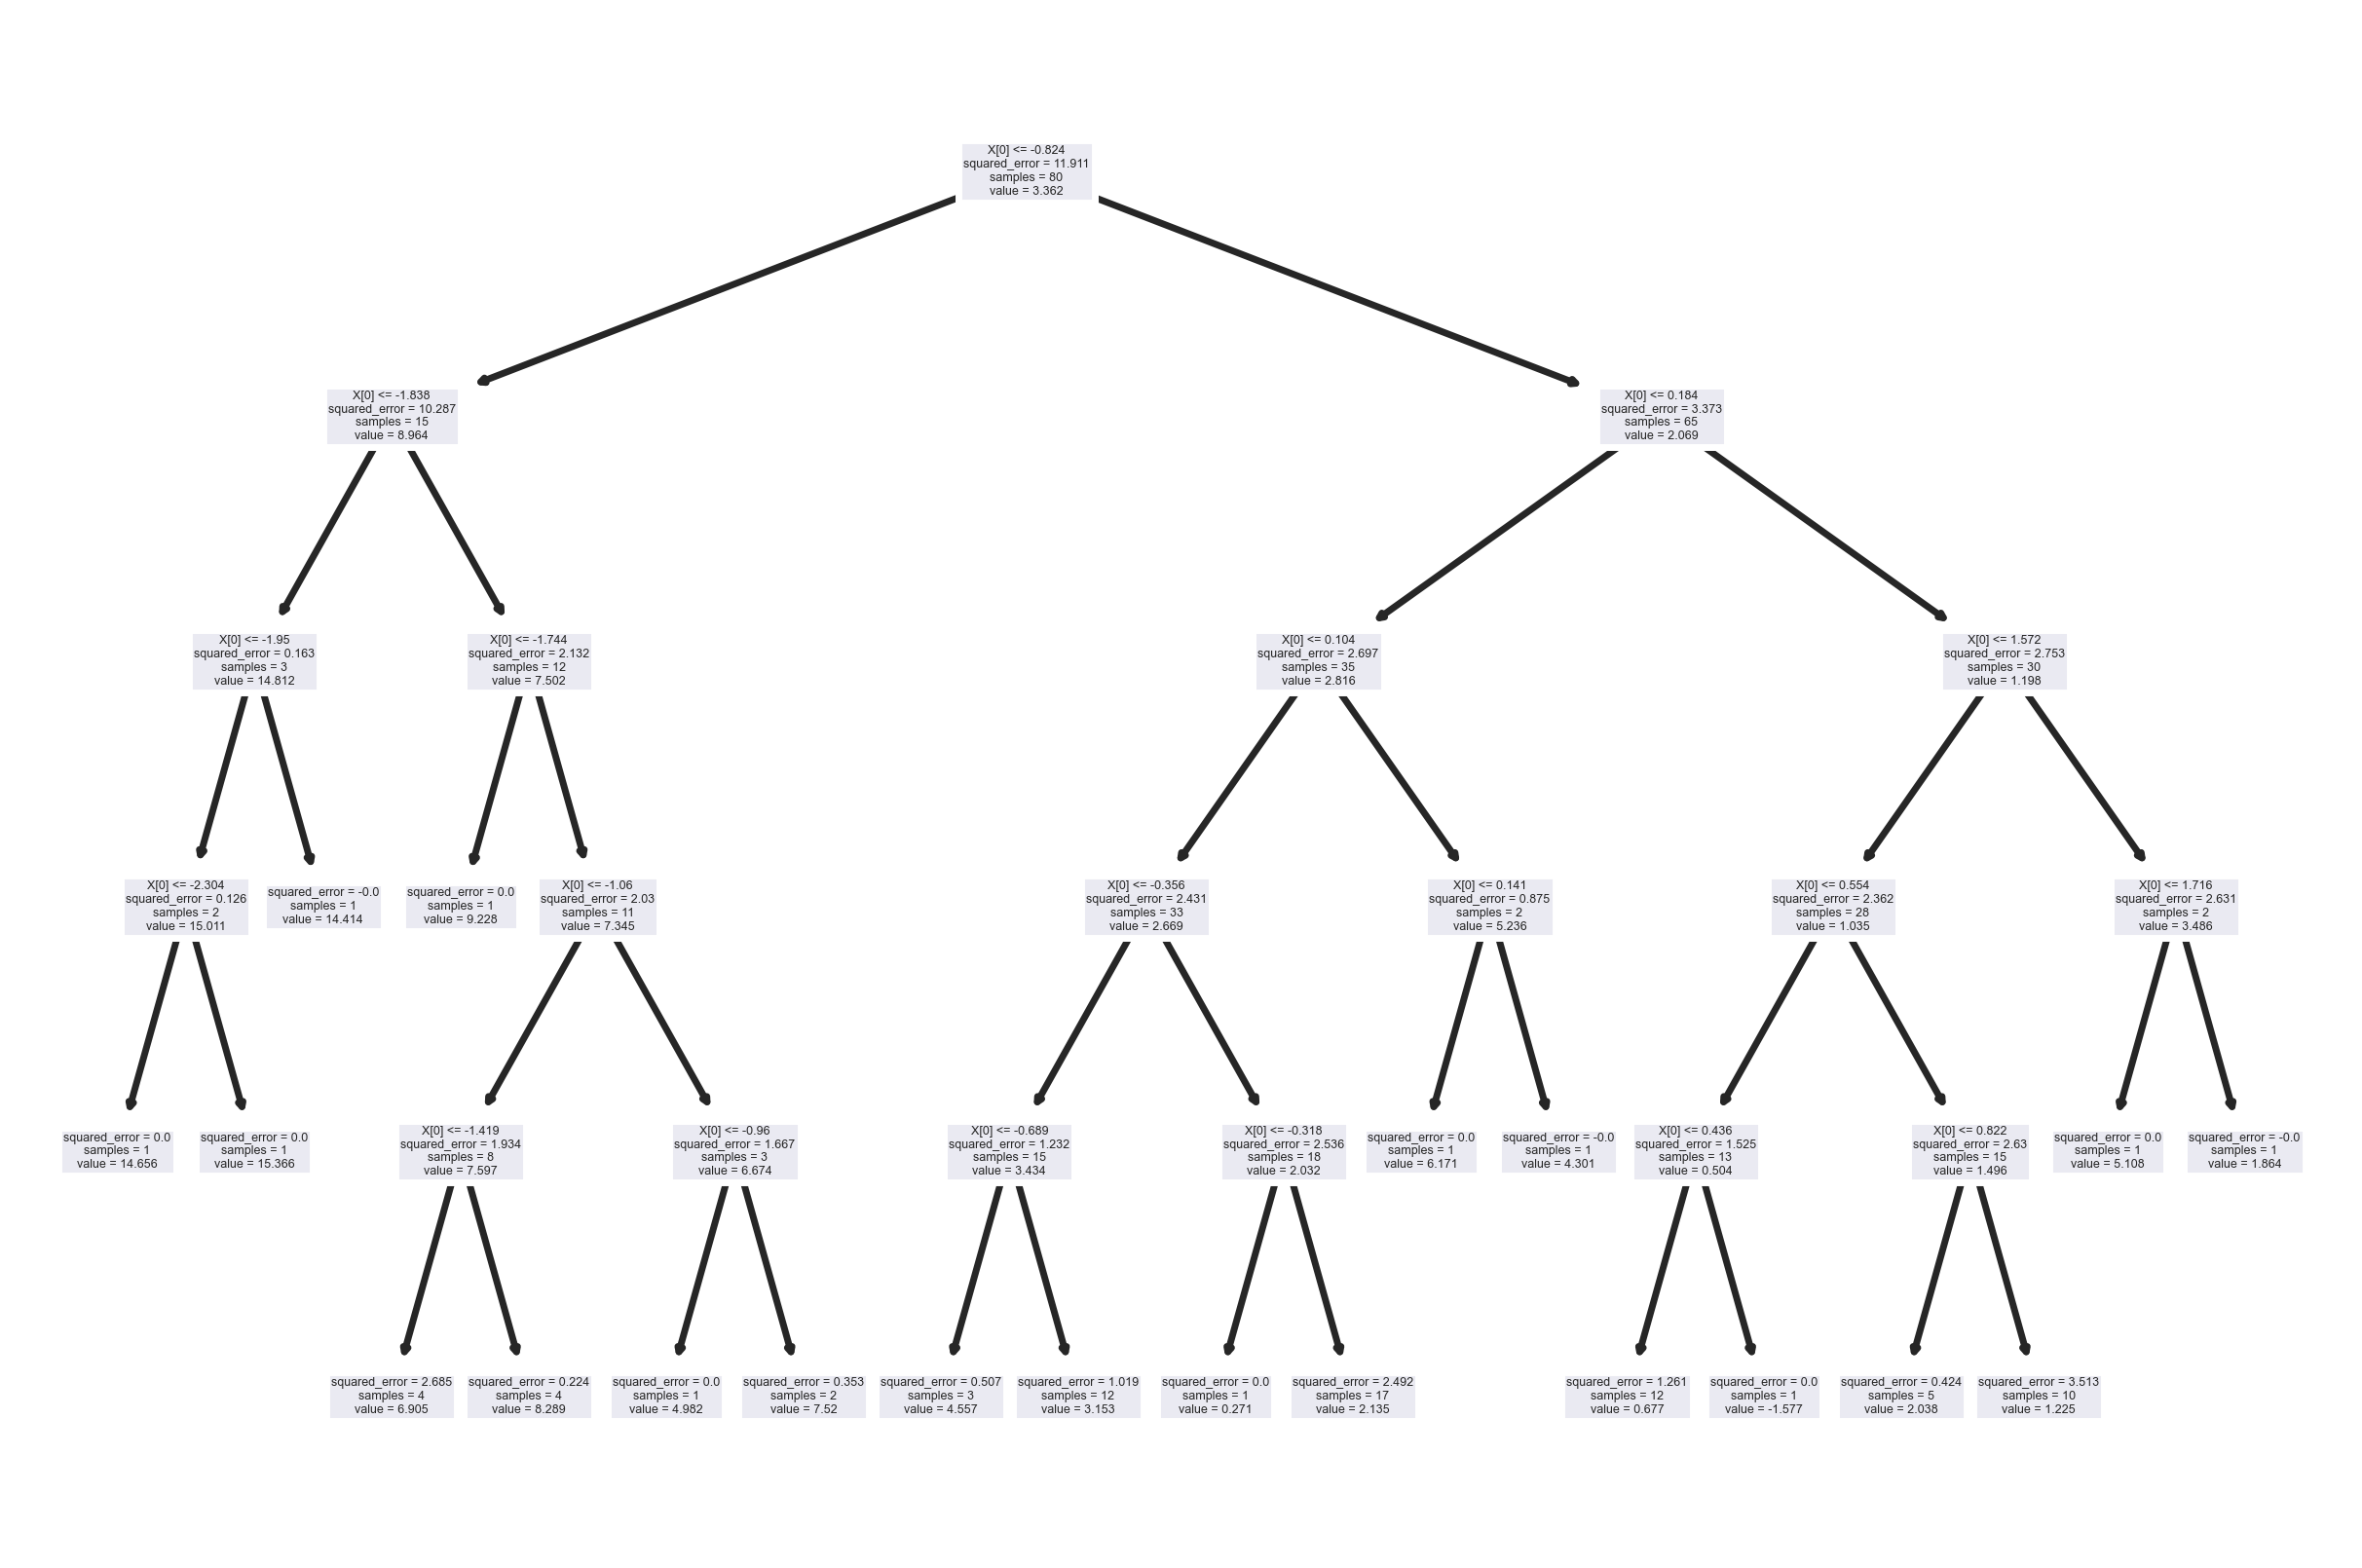

In [635]:
ax, fig = plt.subplots(1, dpi=500)
plot_tree(dt_5)
plt.show()

### Support Vector Machines

![](media\svm.png)
$\hat{y}_i=w^TX_i-b$ - prediction \
$|y_i-\hat{y}_i|<\varepsilon$ - constraint \
$w=\operatorname{argmax}_{w^{*}}{\frac{2}{\left\|w^{*}\right\|}}$ - margin size

#### Soft margins
$$L=\lambda\|w\|^2+\frac{1}{n}\sum_i^n{\max{\left(0,|y_i-\hat{y}_i|-\varepsilon\right)}}$$
$w=\operatorname{argmin}_{w^{*}}{L}$

In [636]:
from sklearn.svm import SVR

svm = SVR(kernel='linear', C=1e4)
svm.fit(x_train, y_train)
model_stats(y_test_plus, svm.predict(x_test))

rmse: 2.0924108239708548 
mae: 1.7131498275631372 
mape: 1.9906841663088932 
r^2: 0.20504016023849791


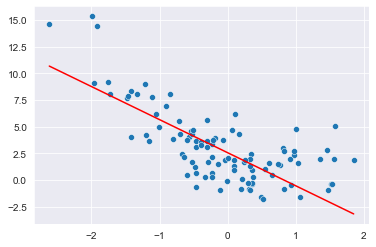

In [637]:
plot_model(svm, x, y)

In [638]:
from sklearn.svm import SVR

rbf = SVR(kernel='rbf', C=1e4)
rbf.fit(x_train, y_train)
model_stats(y_test_plus, rbf.predict(x_test))

rmse: 2.3268977149860652 
mae: 1.7666588028691586 
mape: 1.572207277805542 
r^2: 0.016881520283061113


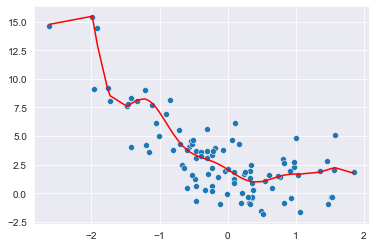

In [639]:
plot_model(rbf, x, y)

In [640]:
from sklearn.svm import SVR

rbf_01 = SVR(kernel='rbf', C=.1)
rbf_01.fit(x_train, y_train)
model_stats(y_test_plus, rbf_01.predict(x_test))

rmse: 1.9832180385144234 
mae: 1.5569435085558592 
mape: 1.8274535681223631 
r^2: 0.28584546029487334


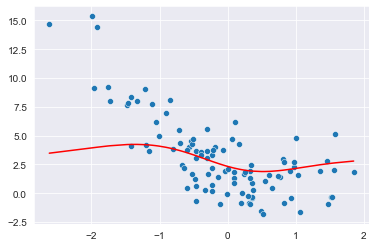

In [641]:
plot_model(rbf_01, x, y)

## Cross Validation

![](media\cv.jpg)

In [642]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring='r2')
scores

array([-1.11306096, -0.29392886,  0.57428296,  0.79991205, -1.40521851,
       -0.77377869, -0.62521854,  0.5454832 , -0.27987173,  0.42236011])

In [643]:
np.mean(scores), np.std(scores)

(-0.21490389699846718, 0.7315504864220608)

In [644]:
def cv_score(model, x, y, cv=10, scoring='r2'):
    
    scores = cross_val_score(model, x, y, cv=cv, scoring=scoring)
    return f'{model.__class__.__name__}: {np.mean(scores)} +/- {np.std(scores)}'

In [645]:
for model in (LinearRegression(), KNeighborsRegressor(5), SVR(C=100), DecisionTreeRegressor(max_depth=5)):
    print(cv_score(model, x_train, y_train), '\n')

LinearRegression: -0.21490389699846718 +/- 0.7315504864220608 

KNeighborsRegressor: 0.2441092619055681 +/- 0.435773192825253 

SVR: 0.20750658858236704 +/- 0.3769412543917387 

DecisionTreeRegressor: 0.0429301688208068 +/- 0.6371958559329692 



### Hyperparameters Tuning

In [646]:
from sklearn.model_selection import GridSearchCV

params = {'C': [1e2, 1e4],
          'kernel': ['rbf', 'poly']}
models = GridSearchCV(SVR(), param_grid=params, scoring='r2', cv=4)
models.fit(x_train, y_train)
models.cv_results_

{'mean_fit_time': array([9.99569893e-04, 1.29805803e-02, 3.77432108e-02, 1.19406974e+00]),
 'std_fit_time': array([6.24398413e-05, 5.33701093e-03, 1.92065752e-02, 4.65308444e-01]),
 'mean_score_time': array([0.00048828, 0.00027341, 0.00059158, 0.00049812]),
 'std_score_time': array([0.00048856, 0.00042107, 0.00060553, 0.00049821]),
 'param_C': masked_array(data=[100.0, 100.0, 10000.0, 10000.0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'poly', 'rbf', 'poly'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 100.0, 'kernel': 'rbf'},
  {'C': 100.0, 'kernel': 'poly'},
  {'C': 10000.0, 'kernel': 'rbf'},
  {'C': 10000.0, 'kernel': 'poly'}],
 'split0_test_score': array([ 0.23302477, -0.12373846,  0.23190255, -0.12329865]),
 'split1_test_score': array([ 0.8374451 ,  0.60974323, -3.87512747,  0.61120783]),
 'split2_test_scor

In [647]:
models.best_estimator_, models.best_params_, models.best_score_

(SVR(C=100.0), {'C': 100.0, 'kernel': 'rbf'}, 0.5586486192154974)

## Multioutput

$y_i=(y_i^{(1)},y_i^{(2)},\ldots,y_i^{(m)})$
$f(X_i)=\hat{y}_i=(\hat{y}_i^{(1)},\hat{y}_i^{(2)},\ldots,\hat{y}_i^{(m)})=(f^{(1)}(X_i),f^{(2)}(X_i),\ldots,f^{(m)}(X_i))$

In [648]:
y_1 = y
y_2 = 2 * x[:, 0] + np.random.randn(len(x[:, 0]))
y = np.vstack((y_1, y_2)).T
y

array([[-1.57744484,  2.16586409],
       [ 1.45435497,  0.25487141],
       [ 0.43869433,  2.04448275],
       [-0.33099431,  4.85501654],
       [ 2.20056313, -0.24132245],
       [ 3.33119574, -0.73923618],
       [ 5.10785929,  3.60471498],
       [ 1.40324223,  2.67111178],
       [ 3.67445575, -0.43752201],
       [ 1.06035948,  2.14575867],
       [-0.69595109, -1.59581021],
       [ 3.09533596, -1.79954373],
       [ 1.69508162, -0.06111307],
       [14.41368601, -5.09394279],
       [ 8.04045526, -3.33953609],
       [ 4.04383701, -1.55460044],
       [ 4.98206558, -0.79545089],
       [-0.86709935, -0.6627297 ],
       [ 6.9262015 , -0.26112547],
       [ 8.32307521, -3.80580774],
       [ 2.79889267,  1.69306669],
       [ 0.68375263, -1.27620393],
       [ 4.67509227,  2.0863365 ],
       [ 4.07570164, -2.88958151],
       [ 4.55883219, -0.55932994],
       [ 6.17136989,  0.03795344],
       [ 3.64570072, -2.39206579],
       [ 0.25715751,  0.24551598],
       [ 3.76134695,

In [649]:
from sklearn.multioutput import MultiOutputRegressor

multi = MultiOutputRegressor(models.best_estimator_)
multi.fit(x, y)
multi.predict(x)

array([[ 0.54649259,  1.68833099],
       [ 2.43191895, -0.61029069],
       [ 0.99637475,  1.94417896],
       [ 1.51181243,  3.42019908],
       [ 2.76185839, -0.73915444],
       [ 2.76180804, -0.73913883],
       [ 1.4642073 ,  3.44128386],
       [ 1.5030812 ,  1.97590645],
       [ 3.38166322, -0.84296097],
       [ 0.64568287,  1.79603937],
       [ 3.36543351, -0.84119769],
       [ 3.37160829, -0.84186332],
       [ 0.770505  ,  0.7122335 ],
       [10.75834763, -3.58539929],
       [ 9.03403558, -3.53232888],
       [ 3.65959744, -0.88303285],
       [ 5.97533844, -1.81315576],
       [ 0.57538941,  1.03297874],
       [ 5.36268851, -1.48313847],
       [ 7.58172854, -3.09180554],
       [ 1.60278919,  3.31497136],
       [ 2.73591328, -0.73093141],
       [ 1.51104516, -0.03282018],
       [ 7.61909314, -3.12111303],
       [ 3.60089224, -0.872802  ],
       [ 1.30605513,  0.13839771],
       [ 6.67976386, -2.29239746],
       [ 0.48756016,  1.28685375],
       [ 3.79522375,

In [650]:
r2(y, multi.predict(x))

0.7276443641211945